Задание 1:¶
Придумайте матрицы, которые обладают следующими свойствами:
P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [2]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [3]:
# a) диагональная, ортогональная, но не единичная(!):

diag = np.array([[0.5, 0, 0], 
                 [0, 0.5, 0], 
                 [0, 0, 0.5]
                ]
               )
print(diag)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]


In [4]:
# b) верхнетреугольная, ортогональная:
top_corner = np.array([[0.5, 0.5, 0.5], 
                 [0, 0.5, 0.5], 
                 [0, 0, 0.5]
                ]
               )
print(top_corner)


[[0.5 0.5 0.5]
 [0.  0.5 0.5]
 [0.  0.  0.5]]


In [5]:
# c) нижнетреугольная, ортогональная:
bottom_corner = np.array([[0.5, 0, 0], 
                 [0.5, 0.5, 0], 
                 [0.5, 0.5, 0.5]
                ]
               )
print(bottom_corner)

[[0.5 0.  0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0.5]]


In [6]:
# d) матрица, у которой определитель = 1, и все элементы не равны 0:
import numpy as np
mat2_det1 = np.array([[1, 1],[1, 2]])

print(mat2_det1)
print (f"Детерминант равен: {np.linalg.det(mat2_det1)}")

[[1 1]
 [1 2]]
Детерминант равен: 1.0


In [7]:
# e) матрица (3x3), у которой определитель = 1:
mat_3_det1 = np.array([[2, 1, 1], 
                       [1, 2, 1], 
                       [1, 1, 1]
                ]
               )

print(mat_3_det1)
print (f"Детерминант равен: {np.linalg.det(mat_3_det1)}")

[[2 1 1]
 [1 2 1]
 [1 1 1]]
Детерминант равен: 1.0


Задание 2:
Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [8]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [9]:
# Расчет
# (2-L)*(3-L)-2*1=0
# L^2-5L+4=0
# Собственные значения равны:
# L1=1, L2=4

# L1:
# (2-1)*x+2y = 0
# (1)*x +(3-1)*y = 0
# x=-2y

# L2:
# (2-4)*x+2y = 0
# (1)*x +(3-4)*y = 0
# x=y  

# Собственные вектора матриц равны:
u1 = np.array([[-2, 1]])
u2 = np.array([[1, 1]])

# собственные значения
L1 = 1
L2 = 4


In [10]:
# Собственные вектора методом NumPy получились другие. В интернете нашел, что они коллинеарны. Но не знаю как проверить
np.linalg.eig(m)
# Вопрос к преподавателю: По какому принципу eig() выбирает какие значения выводить 
# в качестве собственных векторов матрицы?

(array([1., 4.]), array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

In [11]:
# from numpy import linalg as LA
# v[:,1] = LA.eig(m)

In [12]:
# Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy
m3 = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m3)
np.linalg.eig(m3)
# Корни многочлена 6, 3, 3

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


(array([6., 3., 3.]), array([[-0.57735027, -0.81649658,  0.15430335],
        [-0.57735027,  0.40824829,  0.6172134 ],
        [ 0.57735027, -0.40824829,  0.77151675]]))

Задание 3:
Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [13]:
m = np.array([[1, 2],
              [2,3]])
print(m)



[[1 2]
 [2 3]]


In [20]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798+0.j  4.23606798+0.j]

Eigenvectors:
[[-0.85 -0.53]
 [0.53 -0.85]]


In [21]:
print(U * np.diag(a) * U.T)

[[-0.17082039+0.j -0.        +0.j]
 [-0.        +0.j  3.06524758-0.j]]


Задание 4:
Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [130]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [131]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [132]:
X, y = load_digits(return_X_y=True)

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


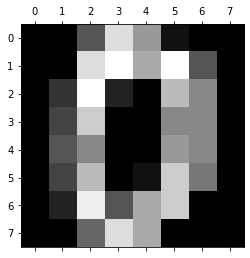

In [133]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [134]:
svd = TruncatedSVD(n_components=1)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.028708507745601956

In [135]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.11463550361713967

In [136]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
oob_score_main = []

# Range of `n_components` values to explore.
min_components = 1
max_components = 63



In [137]:
# Создаем цикл по перебору количества компонент для упрощения
for i in range(min_components, max_components+1):
        svd = TruncatedSVD(n_components=i)
        X_reduced = svd.fit_transform(X)
        rf_reduced = RandomForestClassifier(oob_score=True)
        rf_reduced.fit(X_reduced, y)
        oob_score_1 = rf_reduced.oob_score_
        oob_score_main.append((i, oob_score_1))
# print(error_rate)

# Convert a list of tuple to dictionary
oob_score_dict = dict(oob_score_main)

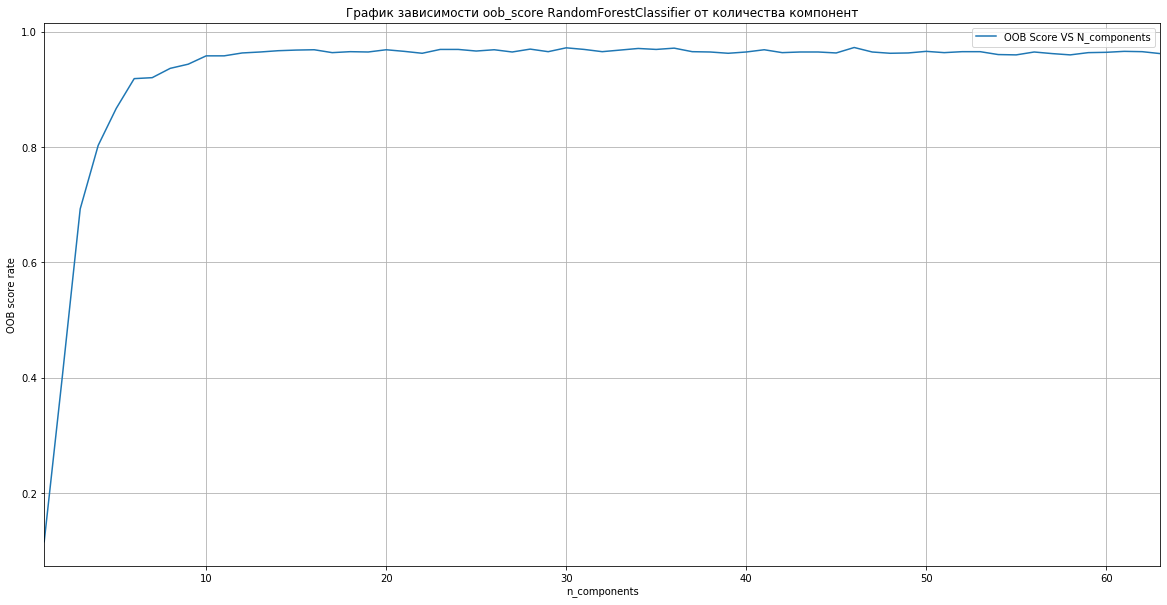

In [138]:
# Формируем график
import matplotlib.pylab as plt

lists = sorted(oob_score_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(20,10))
plt.plot(x, y, Label = 'OOB Score VS N_components')
plt.xlim(min_components, max_components)
plt.xlabel("n_components")
plt.ylabel("OOB score rate")
plt.legend()
plt.grid(True)
plt.title('График зависимости oob_score RandomForestClassifier от количества компонент')
plt.show()
